### Este código Python genera un conjunto de datos simulado de 30 casos judiciales con fines de prueba o análisis.

In [1]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta

# Configuración de la Faker para Argentina
fake = Faker('es_AR')

num_casos = 30

# Generar fechas de inicio
fechas_inicio = [fake.date_between(start_date='-5y', end_date='today') for _ in range(num_casos)]
fechas_inicio_datetime = pd.to_datetime(fechas_inicio)

# Generar fechas de último movimiento asegurando que sean mayores o iguales a la fecha de inicio
fechas_ultimo_movimiento_datetime = []
for fecha_inicio in fechas_inicio_datetime:
    fecha_ultimo_movimiento = fake.date_time_between(start_date=fecha_inicio, end_date='now')  # Usa datetime
    fechas_ultimo_movimiento_datetime.append(fecha_ultimo_movimiento)

data = {
    'ID_Caso': range(1, num_casos + 1),
    'Fecha_Inicio': fechas_inicio_datetime,
    'Tipo_Causa': [random.choice(['Civil', 'Penal', 'Laboral', 'Comercial']) for _ in range(num_casos)],
    'Estado_Actual': [random.choice(['En Curso', 'Pendiente de Juicio', 'Apelación', 'Ejecución']) for _ in range(num_casos)],
    'Juzgado': [f"Juzgado {random.randint(1, 20)} de {fake.city()}" for _ in range(num_casos)],
    'Partes': [f"{fake.name()} vs. {fake.name()}" for _ in range(num_casos)],
    'Materia': [random.choice(['Daños y Perjuicios', 'Robo', 'Despido', 'Quiebra']) for _ in range(num_casos)],
    'Fecha_Ultima_Movimiento': fechas_ultimo_movimiento_datetime,
    'Tiempo_Proceso_Dias': [0] * num_casos,  # Inicializar, se calculará luego
    'Fallo': [random.choice(['Favorable', 'Desfavorable', 'Conciliación', 'Sin Definir']) for _ in range(num_casos)],
    'Instancia': [random.choice(['Primera Instancia', 'Cámara de Apelaciones', 'Corte Suprema']) for _ in range(num_casos)],
    'Tiene_Recurso': [random.choice(['Sí', 'No']) for _ in range(num_casos)],
    'Documentos_Adjuntos': np.random.randint(0, 50, num_casos),
}

df = pd.DataFrame(data)


# Modificar 'Materia' si 'Tipo_Causa' es 'Penal'
def modificar_materia(df):
    for index, row in df.iterrows():
        if row['Tipo_Causa'] == 'Penal':
            materias = ['Daños y Perjuicios', 'Robo', 'Despido', 'Quiebra', 'Corrupción']
            df.loc[index, 'Materia'] = random.choice(materias)
    return df


df = modificar_materia(df.copy()) # Aplicar la modificación al DataFrame

# Calcular Tiempo_Proceso_Dias correctamente
df['Tiempo_Proceso_Dias'] = (df['Fecha_Ultima_Movimiento'] - df['Fecha_Inicio']).dt.days

nombre_archivo_csv = 'df_casos_judiciales.csv'
df.to_csv(nombre_archivo_csv, index=False)

print(f"El DataFrame se ha guardado exitosamente en el archivo '{nombre_archivo_csv}'")
df

El DataFrame se ha guardado exitosamente en el archivo 'df_casos_judiciales.csv'


,ID_Caso,Fecha_Inicio,Tipo_Causa,Estado_Actual,Juzgado,Partes,Materia,Fecha_Ultima_Movimiento,Tiempo_Proceso_Dias,Fallo,Instancia,Tiene_Recurso,Documentos_Adjuntos
0,1,2022-11-12,Comercial,Pendiente de Juicio,Juzgado 15 de Rawson,Isabella Juan Ignacio Ruiz vs. Malena Malena V...,Quiebra,2023-01-23 03:00:14.564857,72,Desfavorable,Cámara de Apelaciones,Sí,40
1,2,2025-04-11,Laboral,Pendiente de Juicio,Juzgado 2 de San Salvador de Jujuy,Benjamin Ezequiel Juan Bautista Garcia Quiroga...,Quiebra,2025-09-03 05:09:56.921831,145,Desfavorable,Cámara de Apelaciones,Sí,15
2,3,2021-09-01,Penal,En Curso,Juzgado 3 de Mar del Plata,Gael Romero vs. Maximo Vazquez Lopez,Quiebra,2024-07-27 16:43:14.690445,1060,Favorable,Primera Instancia,No,44
3,4,2024-08-12,Civil,Ejecución,Juzgado 8 de San Salvador de Jujuy,Luciana Martinez vs. Maria Victoria Alma Rios ...,Daños y Perjuicios,2025-08-15 08:16:27.088332,368,Favorable,Cámara de Apelaciones,No,1
4,5,2024-04-29,Civil,Apelación,Juzgado 12 de Santa Fe,Sofia Sofía Ledesma Romero vs. Tomas Benjamin ...,Robo,2025-02-06 08:18:41.514420,283,Desfavorable,Primera Instancia,Sí,33
5,6,2022-04-14,Civil,Pendiente de Juicio,Juzgado 4 de Santiago del Estero,Federico Godoy Romero vs. Sr(a). Tomàs Alvarez,Despido,2024-11-27 11:29:46.795956,958,Favorable,Cámara de Apelaciones,Sí,14
6,7,2024-08-08,Penal,Ejecución,Juzgado 17 de Resistencia,Guillermina Sanchez vs. Sr(a). Santino Martinez,Despido,2024-12-25 10:01:55.499676,139,Conciliación,Primera Instancia,Sí,37
7,8,2022-09-20,Laboral,Pendiente de Juicio,Juzgado 18 de La Plata,Dr(a). Gael Gonzalez vs. Dr(a). Antonella Ojeda,Robo,2023-07-24 20:18:51.348859,307,Favorable,Corte Suprema,Sí,30
8,9,2021-12-05,Civil,Ejecución,Juzgado 17 de San Luis,Juana Ian Ezequiel Perez vs. Juliana Faustino ...,Despido,2022-03-06 15:15:21.801710,91,Favorable,Primera Instancia,Sí,11
9,10,2025-04-19,Civil,Apelación,Juzgado 1 de Paraná,Nicolas Moreno vs. Santino Catalina Gonzalez M...,Daños y Perjuicios,2025-09-03 04:25:55.823364,137,Favorable,Cámara de Apelaciones,Sí,47


### Este código Python realiza un análisis estadístico y exploratorio detallado sobre un conjunto de datos simulado de casos judiciales cargado desde un archivo CSV.


Análisis de Casos Judiciales:
----------------------------------------

Número total de casos: 30

1. Análisis del Tiempo de Proceso:
Tiempo promedio de proceso (días): 397.63
Tiempo mínimo de proceso (días): 19
Tiempo máximo de proceso (días): 1343

Distribución del Tiempo de Proceso:


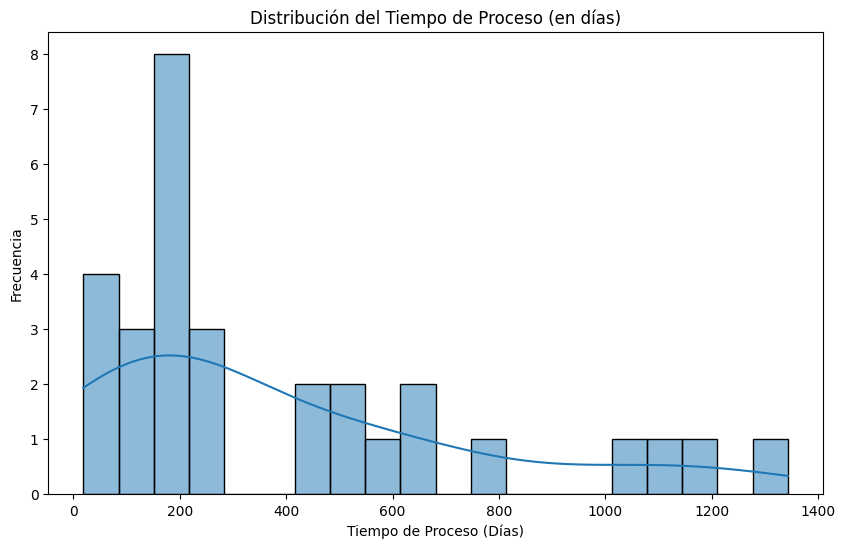


2. Análisis de Fallos:

Distribución de los Fallos:
Fallo
Conciliación    9
Sin Definir     8
Favorable       8
Desfavorable    5
Name: count, dtype: int64


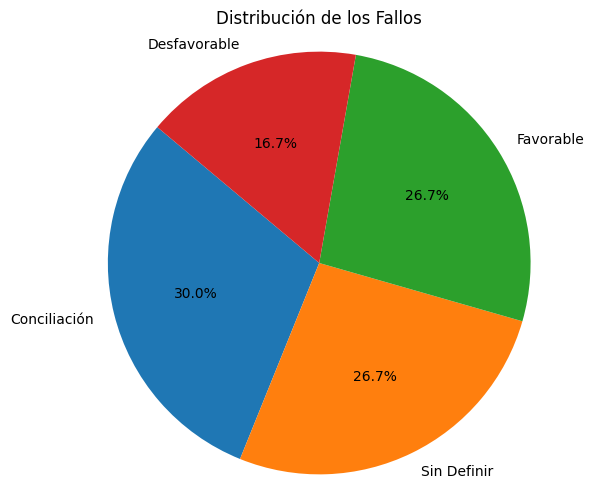


3. Tiempo de Proceso por Tipo de Causa:

Tiempo promedio de proceso por tipo de causa (días):
Tipo_Causa
Penal        552.333333
Civil        453.200000
Laboral      419.000000
Comercial    196.125000
Name: Tiempo_Proceso_Dias, dtype: float64


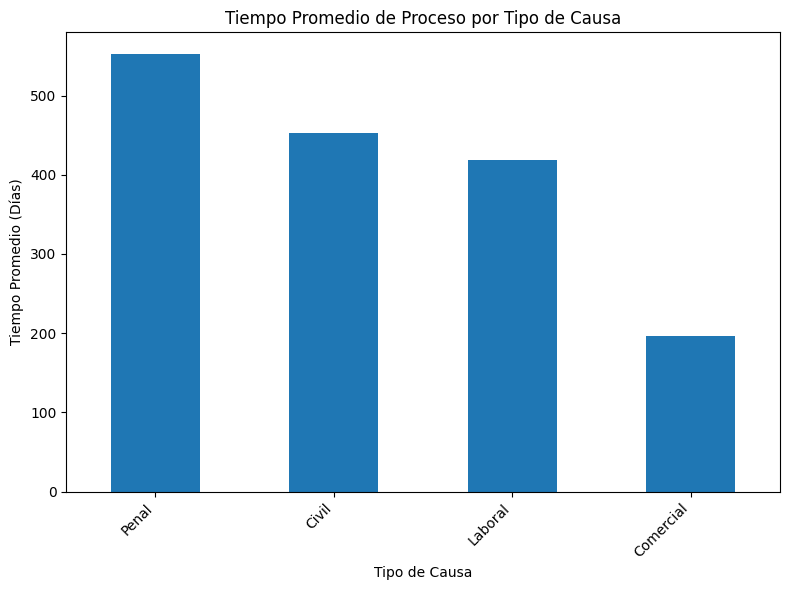


4. Fallos por Tipo de Causa:

Distribución de los Fallos por Tipo de Causa:
Fallo       Conciliación  Desfavorable  Favorable  Sin Definir
Tipo_Causa                                                    
Civil                  4             1          3            2
Comercial              3             1          1            3
Laboral                0             2          3            1
Penal                  2             1          1            2


<Figure size 1000x600 with 0 Axes>

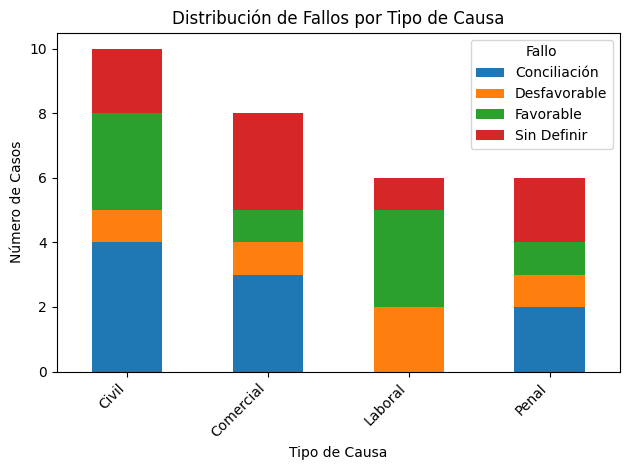


5. Tiempo de Proceso por Estado Actual:

Tiempo promedio de proceso por estado actual (días):
Estado_Actual
Pendiente de Juicio    641.000000
Apelación              460.714286
En Curso               417.833333
Ejecución              249.333333
Name: Tiempo_Proceso_Dias, dtype: float64


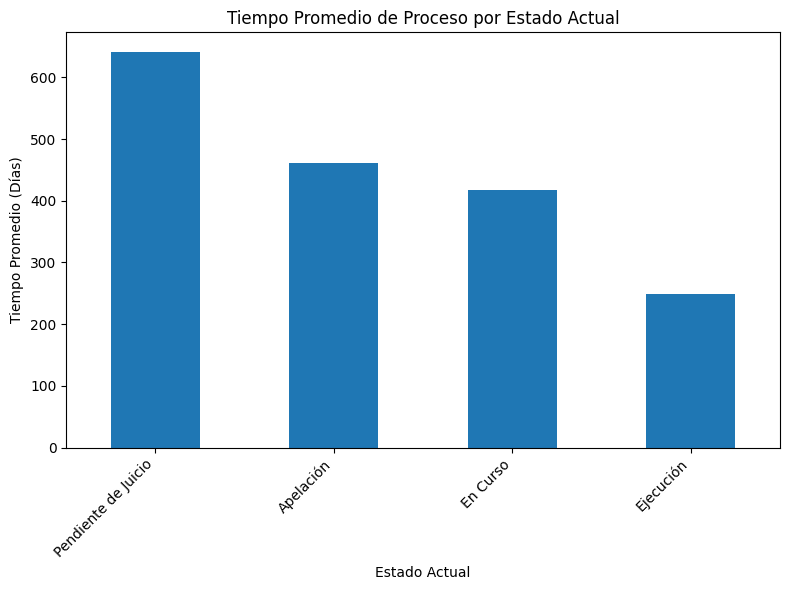


6. Fallos por Instancia:

Distribución de los Fallos por Instancia:
Fallo                  Conciliación  Desfavorable  Favorable  Sin Definir
Instancia                                                                
Corte Suprema                     3             3          4            1
Cámara de Apelaciones             4             1          2            2
Primera Instancia                 2             1          2            5


<Figure size 800x600 with 0 Axes>

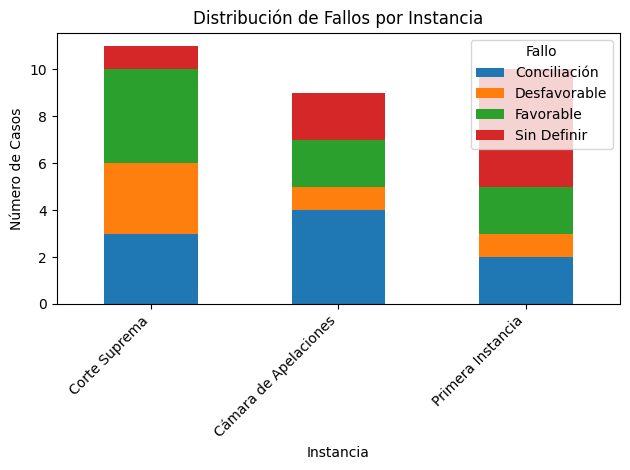

In [3]:
import pandas as pd
from faker import Faker
import numpy as np
import random
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/Viny2030/Libro_Algoritmos_contra_fraude_corrupcion/refs/heads/main/df_casos_judiciales.csv"
data_casos = pd.read_csv(url)
df_casos = pd.DataFrame(data_casos)


def analizar_justicia(df_casos):
    """Analiza los datos de casos judiciales."""
    print("\nAnálisis de Casos Judiciales:")
    print("-" * 40)

    print(f"\nNúmero total de casos: {len(df_casos)}")

    # 1. Tiempo de Proceso
    print("\n1. Análisis del Tiempo de Proceso:")
    print(f"Tiempo promedio de proceso (días): {df_casos['Tiempo_Proceso_Dias'].mean():.2f}")
    print(f"Tiempo mínimo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].min()}")
    print(f"Tiempo máximo de proceso (días): {df_casos['Tiempo_Proceso_Dias'].max()}")
    print("\nDistribución del Tiempo de Proceso:")
    plt.figure(figsize=(10, 6))
    sns.histplot(df_casos['Tiempo_Proceso_Dias'], bins=20, kde=True)
    plt.title('Distribución del Tiempo de Proceso (en días)')
    plt.xlabel('Tiempo de Proceso (Días)')
    plt.ylabel('Frecuencia')
    plt.show()

    # 2. Análisis de Fallos
    print("\n2. Análisis de Fallos:")
    fallos_counts = df_casos['Fallo'].value_counts()
    print("\nDistribución de los Fallos:")
    print(fallos_counts)
    plt.figure(figsize=(6, 6))
    plt.pie(fallos_counts, labels=fallos_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribución de los Fallos')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

    # 3. Tiempo de Proceso por Tipo de Causa
    print("\n3. Tiempo de Proceso por Tipo de Causa:")
    tiempo_por_causa = df_casos.groupby('Tipo_Causa')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por tipo de causa (días):")
    print(tiempo_por_causa)
    plt.figure(figsize=(8, 6))
    tiempo_por_causa.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Tipo de Causa')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 4. Fallos por Tipo de Causa
    print("\n4. Fallos por Tipo de Causa:")
    fallos_por_causa = df_casos.groupby(['Tipo_Causa', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Tipo de Causa:")
    print(fallos_por_causa)
    plt.figure(figsize=(10, 6))
    fallos_por_causa.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Tipo de Causa')
    plt.ylabel('Número de Casos')
    plt.xlabel('Tipo de Causa')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 5. Tiempo de Proceso por Estado Actual
    print("\n5. Tiempo de Proceso por Estado Actual:")
    tiempo_por_estado = df_casos.groupby('Estado_Actual')['Tiempo_Proceso_Dias'].mean().sort_values(ascending=False)
    print("\nTiempo promedio de proceso por estado actual (días):")
    print(tiempo_por_estado)
    plt.figure(figsize=(8, 6))
    tiempo_por_estado.plot(kind='bar')
    plt.title('Tiempo Promedio de Proceso por Estado Actual')
    plt.ylabel('Tiempo Promedio (Días)')
    plt.xlabel('Estado Actual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 6. Fallos por Instancia
    print("\n6. Fallos por Instancia:")
    fallos_por_instancia = df_casos.groupby(['Instancia', 'Fallo']).size().unstack(fill_value=0)
    print("\nDistribución de los Fallos por Instancia:")
    print(fallos_por_instancia)
    plt.figure(figsize=(8, 6))
    fallos_por_instancia.plot(kind='bar', stacked=True)
    plt.title('Distribución de Fallos por Instancia')
    plt.ylabel('Número de Casos')
    plt.xlabel('Instancia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Llamada a la función
analizar_justicia(df_casos)